In [598]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from IPython.display import display

In [599]:
file_name_1 = 'DWL_USGS_Sites/Malletts_Creek_Discharge'
var_1 = 'Mean_CFS'
file_name_2 = 'DWL_USGS_Sites/Malletts_Creek_Elevation'
var_2 = 'Gage_Height'

# file_name_1 = 'DWL_USGS_Sites/Huron_River_Discharge'
# var_1 = 'Mean_CFS'
# file_name_2 = 'DWL_USGS_Sites/Huron_River_Elevation'
# var_2 = 'Gage_Height'

# file_name_1 = 'DWL_USGS_Sites/Allen_Creek_Discharge_1'
# var_1 = 'Mean_CFS'
# file_name_2 = 'DWL_USGS_Sites/Allen_Creek_Elevation'
# var_2 = 'Gage_Height'

# file_name_1 = 'DWL_USGS_Sites/Mill_Creek_Discharge'
# var_1 = 'Mean_CFS'
# file_name_2 = 'DWL_USGS_Sites/Mill_Creek_Elevation_1'
# var_2 = 'Gage_Height'

# file_name_1 = 'DWL_USGS_Sites/Huron_River_Hamburg_Discharge'
# var_1 = 'Mean_CFS'
# file_name_2 = 'DWL_USGS_Sites/Huron_River_Hamburg_Elevation'
# var_2 = 'Gage_Height'

In [600]:
def DWL_CCDF_df(file_name, var):
    
    # df = pd.read_csv(file_name + ".csv")

    # df[["Year", "Month", "Day"]] = df["Datetime"].str.split("-", expand=True)

    df = pd.read_csv(file_name+".csv")
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    df

    current_date = pd.Timestamp.now()
    ten_years_ago = current_date - pd.DateOffset(years=10)
    
    # Filter DataFrame for data in the last 10 years
    df = df[df['Datetime'] >= ten_years_ago]

    time_period_data = df

    sorted_data = time_period_data.sort_values(var, ascending=False)

    time_period_data['ranked_column_m'] = sorted_data[var].rank(method='first', ascending=False)

    df['numbered_col'] = range(1, len(df) + 1)
    
    print("ranked column m:", time_period_data['ranked_column_m'].head())

    n = len(time_period_data)

    df['P_Value'] = range(1, len(df) + 1)

    time_period_data['P_Value'] = (time_period_data['ranked_column_m'] / (n + 1)) * 100
    print(time_period_data['P_Value'])
    # df = august_data
    # return df
    return(time_period_data)

In [601]:
def DWL_plotTimeSeries(file_name, var):

    df = pd.read_csv(file_name+".csv")
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    df

    current_date = pd.Timestamp.now()
    ten_years_ago = current_date - pd.DateOffset(years=10)
    
    # Filter DataFrame for data in the last 10 years
    df = df[df['Datetime'] >= ten_years_ago]

    # Plot the time series
    fig, ax = plt.subplots(figsize=(16, 6))
    ax.plot(df['Datetime'], df[var], marker='o', linestyle='-')

    plt.title('Time Series Plot of ' + file_name)
    plt.xlabel('Date')
    plt.ylabel(var)
    plt.grid(True)

    return plt.show()

ranked column m: 5573    2207.0
5574    2756.0
5575    2688.0
5576     383.0
5577     286.0
Name: ranked_column_m, dtype: float64
5573    60.548697
5574    75.610425
5575    73.744856
5576    10.507545
5577     7.846365
          ...    
9212    11.577503
9213    21.728395
9214    42.194787
9215    41.399177
9216    53.415638
Name: P_Value, Length: 3644, dtype: float64


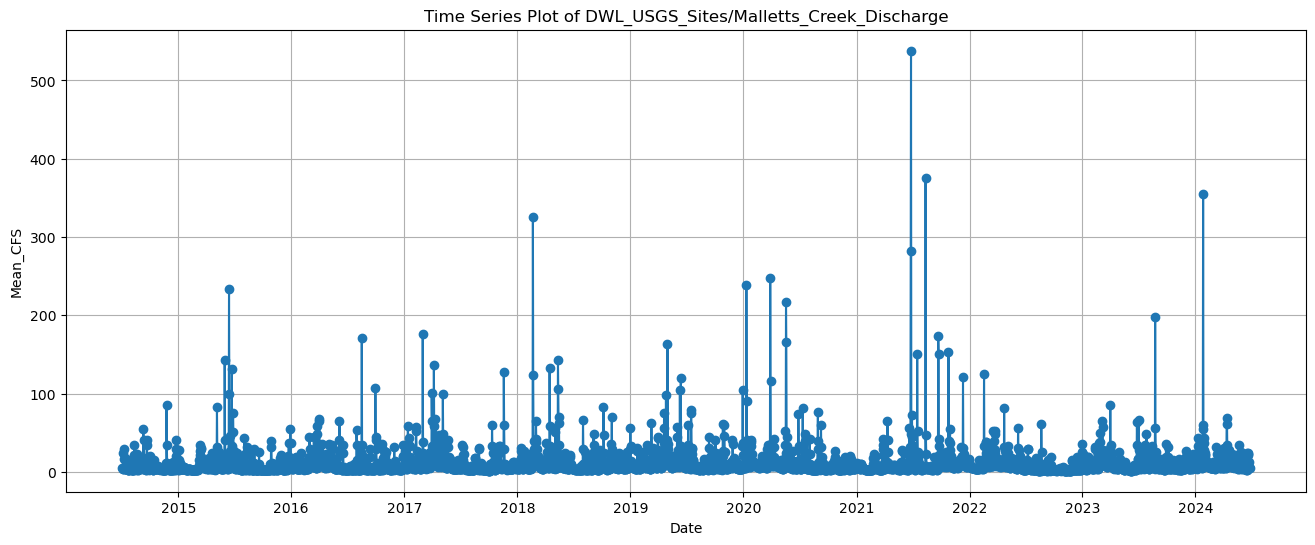

ranked column m: 0    233702.0
1    233878.0
2    233840.0
3    234168.0
4    233855.0
Name: ranked_column_m, dtype: float64
0         99.783101
1         99.858247
2         99.842022
3         99.982067
4         99.848427
            ...    
234204    28.299389
234205    28.299816
234206    28.300243
234207    28.300670
234208    29.293369
Name: P_Value, Length: 234209, dtype: float64


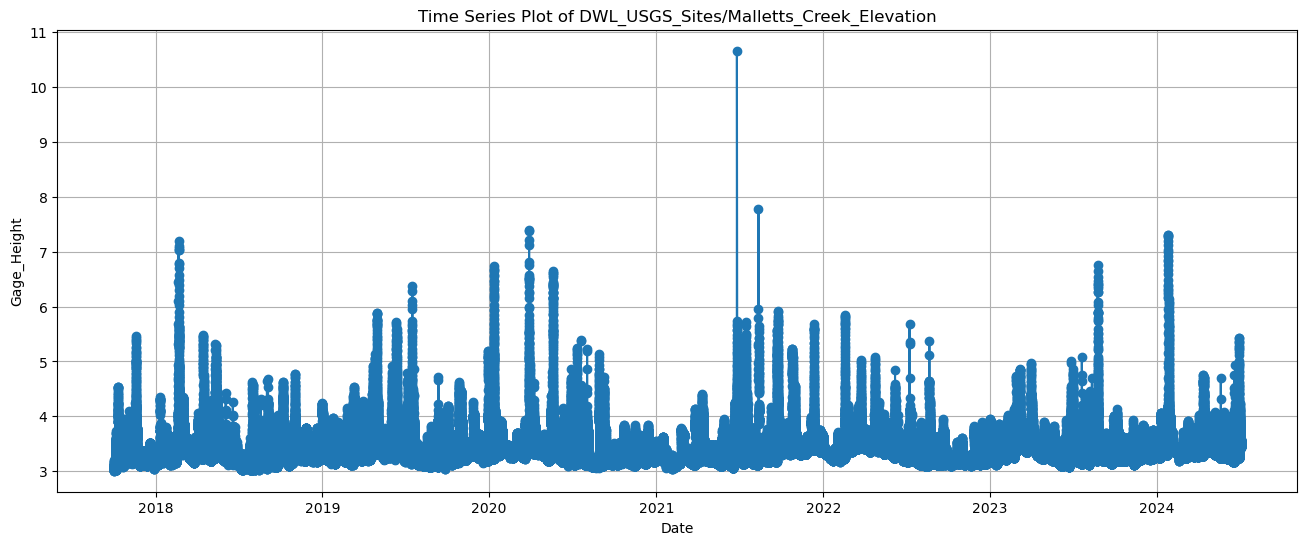

In [602]:
df1 = DWL_CCDF_df(file_name = file_name_1, var = var_1)
DWL_plotTimeSeries(file_name = file_name_1, var = var_1)

df2 = DWL_CCDF_df(file_name = file_name_2, var = var_2)
DWL_plotTimeSeries(file_name = file_name_2, var = var_2)

In [603]:
# def DWL_overlay_df(df1, df2, var_1, var_2):
#     fig, ax = plt.subplots(figsize=(12, 4))
#     ax.plot(df1['Datetime'], df1[var_1], marker='o', linestyle='-')
#     ax.plot(df2['Datetime'], df2[var_2], marker='o', linestyle='-', color = 'orange')

#     plt.title('Time Series Plot')
#     plt.xlabel('Date')
#     plt.ylabel('Value')
#     plt.grid(True)

#     plt.show()

In [604]:
# DWL_overlay_df(df1, df2, var_1, var_2)

In [605]:
def DWL_CCDF_plot_P(df, x, y, P, file_name):
    df_sorted = df.sort_values(by='P_Value')

    fig, ax = plt.subplots(figsize=(16, 6))
    ax.plot(df_sorted[x], df_sorted[y], marker='o', linestyle='-')

    # Interpolate the y-value where P_Value = 50
    #p_value = P
    if P in df_sorted[x].values:
        intersection_y = df_sorted[df_sorted[x] == P][y].values[0]
    else:
        intersection_y = np.interp(P, df_sorted[x], df_sorted[y])

    # Plot vertical line at P_Value = 50
    ax.axvline(x=P, color='blue', linestyle='--')

    # Add a horizontal line at the intersection point
    ax.axhline(y=intersection_y, color='green', linestyle='--')

    # Annotate the intersection point
    if y == 'Mean_CFS':
        ax.annotate(f'{intersection_y:.2f}', xy=(P, intersection_y), xytext=(P + 1, intersection_y + 5),
                    arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='green')
    
    if y == 'Gage_Height':
        ax.annotate(f'{intersection_y:.2f}', xy=(P, intersection_y), xytext=(P + 1, intersection_y + .1),
                    arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='green')

    # Add scatter plot for individual points
    # ax.scatter(df_sorted[x], df_sorted[y], color='red')
    #plot scatter

    if y == 'Mean_CFS':
        plt.title('CCDF of DWL Site: ' + file_name + " for Mean Daily Flow with " + str(P) + " exceedance probability")
    if y == 'Gage_Height':
        plt.title('CCDF of DWL Site: ' + file_name + " for Gage Height with " + str(P) + " exceedance probability")

    plt.xlabel('Flow Duration Interval (or) Exceedance Probability (%)') #P value
    
    if y == 'Mean_CFS':
        plt.ylabel('Mean Daily Flow (cfs)')
    if y == 'Gage_Height':
        plt.ylabel('Elevation/Gage Height (feet)')
    plt.grid(True)

In [606]:
def DWL_CCDF_Overlay(var_1, var_2, df1, df2, x, site_name):

    df1_sorted = df1.sort_values(by='P_Value')
    df2_sorted = df2.sort_values(by='P_Value')

    fig, ax1 = plt.subplots(figsize=(16, 6))

    color = 'tab:red'
    plt.xlabel('Flow Duration Interval (or) Exceedance Probability (%)')
    ax1.set_ylabel('Mean Daily Flow (cfs)', color=color)
    ax1.plot(df1_sorted[x], df1_sorted[var_1], marker='o', linestyle='-', color = 'red')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Elevation/Gage Height (feet)', color=color)  # we already handled the x-label with ax1
    ax2.plot(df2_sorted[x], df2_sorted[var_2], marker='o', linestyle='-') #, color = 'blue')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('CCDFs of DWL Site: ' + site_name + " for Mean Daily Flow and Gage Height") 

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()


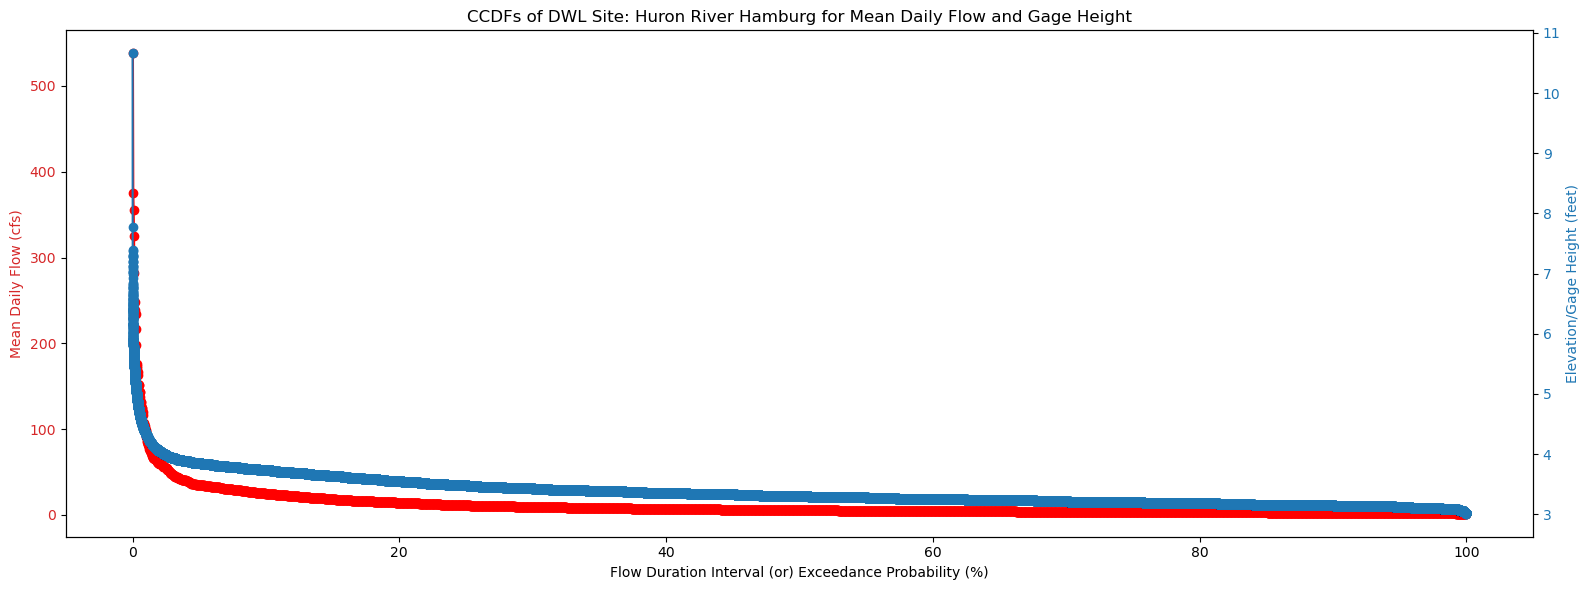

In [607]:
DWL_CCDF_Overlay(var_1, var_2, df1, df2, x = 'P_Value', site_name = 'Huron River Hamburg')

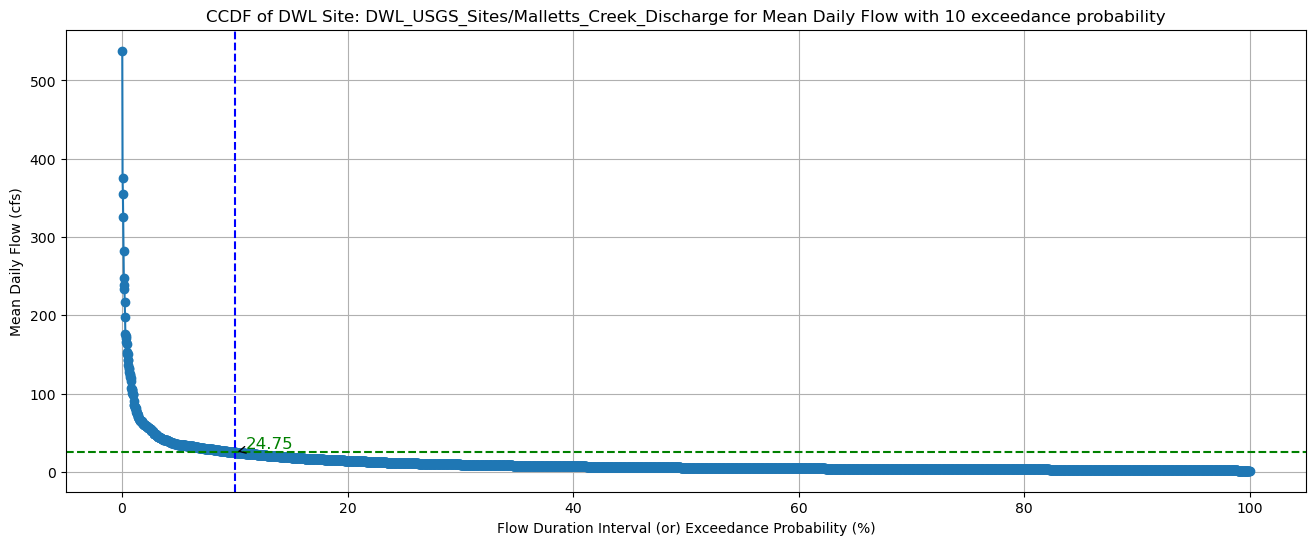

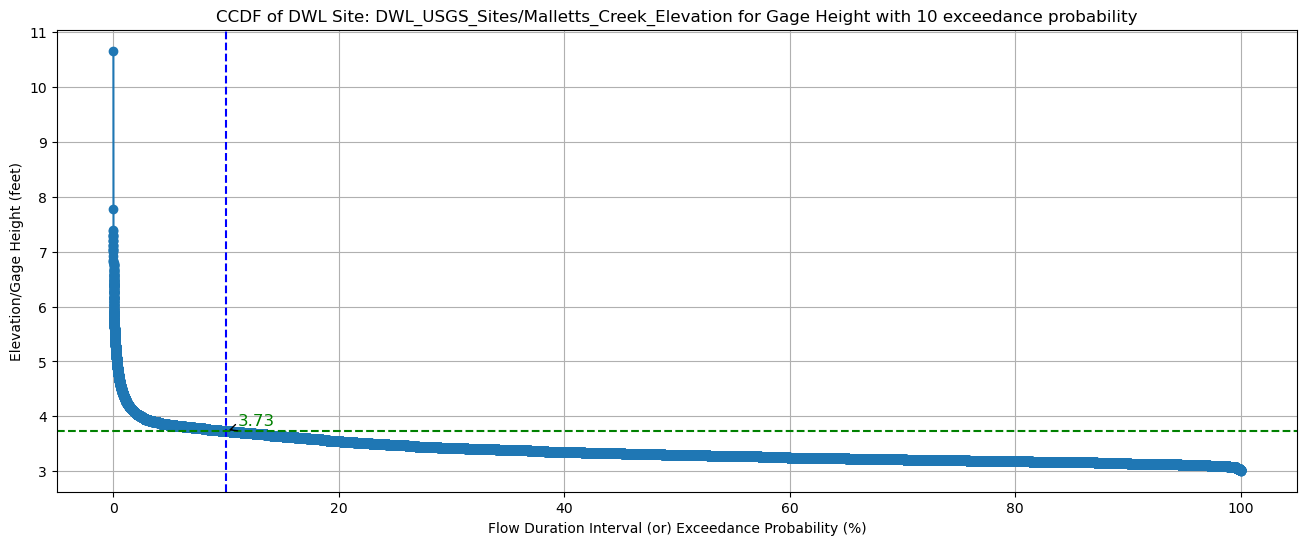

In [608]:
# df = DWL_plotTimeSeries(file_name, var)
DWL_CCDF_plot_P(df = df1, x='P_Value', y= var_1, P=10, file_name = file_name_1)
DWL_CCDF_plot_P(df = df2, x='P_Value', y= var_2, P=10, file_name = file_name_2)